## Import 

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from model import load_features
from config import RESULTS_DIR

## Load data

In [2]:
df = load_features()
df.head()

,Close,High,Low,Open,Volume,log_return,volatility_20d,abs_return,return_squared,lag_1,lag_5,lag_10,lag_20,rolling_abs_return_mean_20d,sentiment,sentiment_lag1,sentiment_scaled,target_volatility
date,,,,,,,,,,,,,,,,,,
1993-03-02,24.793131,24.793131,24.413820,24.448303,182400,0.014711,0.132770,0.014711,0.000216,-0.002818,-0.000715,-0.025551,0.007087,0.005358,0.0,0.0,0.802306,0.109394
1993-03-03,24.896578,24.913819,24.793129,24.827612,280100,0.004164,0.133243,0.004164,0.000017,0.014711,0.012794,-0.000719,0.002116,0.005460,0.0,0.0,0.802306,0.108620
1993-03-04,24.758650,24.931064,24.758650,24.931064,89500,-0.005555,0.129990,0.005555,0.000031,0.004164,0.002116,-0.000720,0.010516,0.005212,0.0,0.0,0.802306,0.107371
1993-03-05,24.689684,24.896581,24.672443,24.793132,40000,-0.002789,0.129422,0.002789,0.000008,-0.005555,0.001408,0.003593,0.004175,0.005143,0.0,0.0,0.802306,0.131427
1993-03-08,25.241415,25.241415,24.741414,24.741414,50800,0.022101,0.151808,0.022101,0.000488,-0.002789,-0.002818,0.003580,-0.000696,0.006213,0.0,0.0,0.802306,0.103419


## Basic info

In [3]:
df.info() 

<class 'pandas.DataFrame'>
DatetimeIndex: 8282 entries, 1993-03-02 to 2026-01-23
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Close                        8282 non-null   float64
 1   High                         8282 non-null   float64
 2   Low                          8282 non-null   float64
 3   Open                         8282 non-null   float64
 4   Volume                       8282 non-null   int64  
 5   log_return                   8282 non-null   float64
 6   volatility_20d               8282 non-null   float64
 7   abs_return                   8282 non-null   float64
 8   return_squared               8282 non-null   float64
 9   lag_1                        8282 non-null   float64
 10  lag_5                        8282 non-null   float64
 11  lag_10                       8282 non-null   float64
 12  lag_20                       8282 non-null   float64
 13  rolling_abs

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,8282.0,1.662710e+02,1.508248e+02,24.061399,7.092597e+01,9.551140e+01,2.235902e+02,6.951600e+02
High,8282.0,1.672030e+02,1.515377e+02,24.321253,7.143216e+01,9.612884e+01,2.246228e+02,6.960900e+02
Low,8282.0,1.652120e+02,1.499746e+02,23.992108,7.034806e+01,9.484785e+01,2.217364e+02,6.913500e+02
Open,8282.0,1.662549e+02,1.507945e+02,24.026765,7.092893e+01,9.553478e+01,2.234611e+02,6.954900e+02
Volume,8282.0,8.349925e+07,8.978940e+07,5200.000000,1.256498e+07,6.331830e+07,1.111382e+08,8.710263e+08
log_return,8282.0,4.032503e-04,1.174485e-02,-0.115886,-4.330941e-03,6.815683e-04,5.930962e-03,1.355770e-01
volatility_20d,8282.0,1.586373e-01,1.003589e-01,0.031861,9.581757e-02,1.341731e-01,1.923341e-01,9.397139e-01
abs_return,8282.0,7.817543e-03,8.773982e-03,0.000000,2.222216e-03,5.328917e-03,1.039159e-02,1.355770e-01
return_squared,8282.0,1.380875e-04,5.043105e-04,0.000000,4.938244e-06,2.839735e-05,1.079852e-04,1.838112e-02
lag_1,8282.0,4.028662e-04,1.174490e-02,-0.115886,-4.330941e-03,6.815683e-04,5.930962e-03,1.355770e-01


## Visualizing Returns

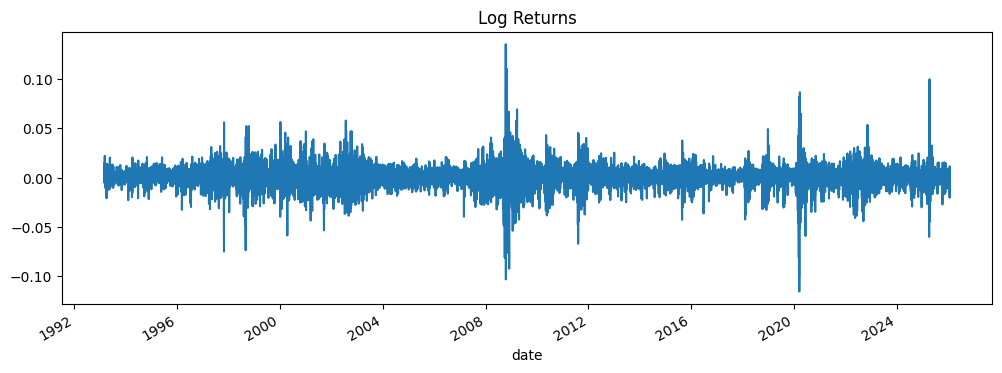

In [5]:
df["log_return"].plot(figsize=(12,4), title="Log Returns")
plt.savefig(f"{RESULTS_DIR}/figures/eda/log_returns.png")

## Volatility clustering

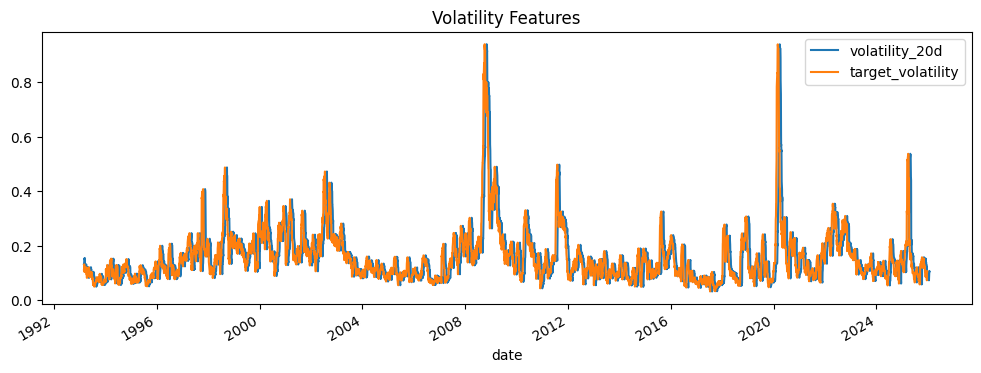

In [6]:
vol_cols = [c for c in df.columns if "volatility" in c]

df[vol_cols].plot(figsize=(12,4))
plt.title("Volatility Features")
plt.savefig(f"{RESULTS_DIR}/figures/eda/volatility_features.png")


## Target inspection

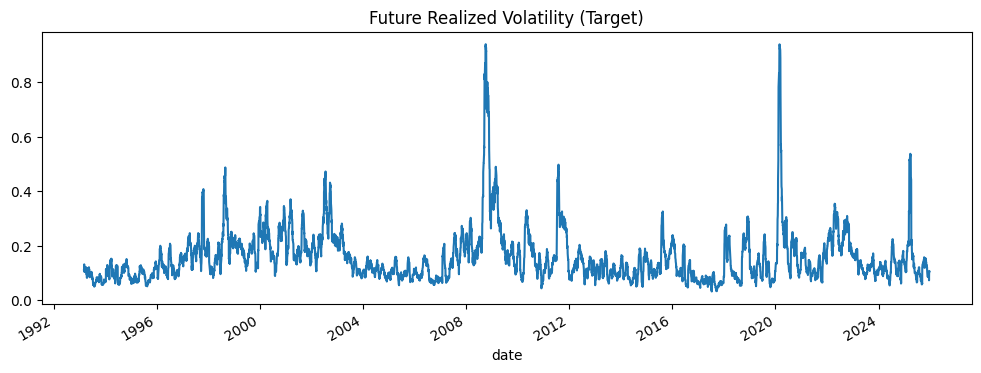

In [7]:
df["target_volatility"].plot(figsize=(12,4),
                             title="Future Realized Volatility (Target)")
plt.savefig(f"{RESULTS_DIR}/figures/eda/target_volatility.png")

## Correlation (features vs target)

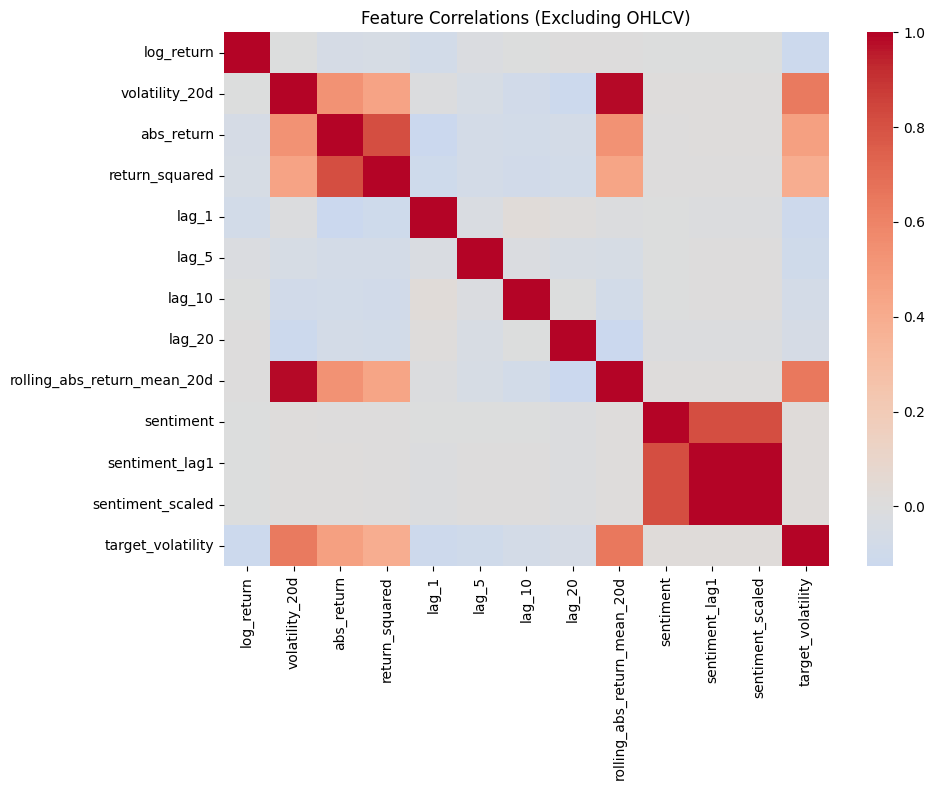

In [8]:
# Exclude OHLCV for cleaner correlation heatmap
exclude_price_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
numeric_df = df.select_dtypes(include=[np.number]).drop(columns=exclude_price_cols, errors='ignore')

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", center=0, annot=False)
plt.title("Feature Correlations (Excluding OHLCV)")
plt.tight_layout()
plt.savefig(f"{RESULTS_DIR}/figures/eda/correlations.png", dpi=300, bbox_inches="tight")

## Sentiment Frequency

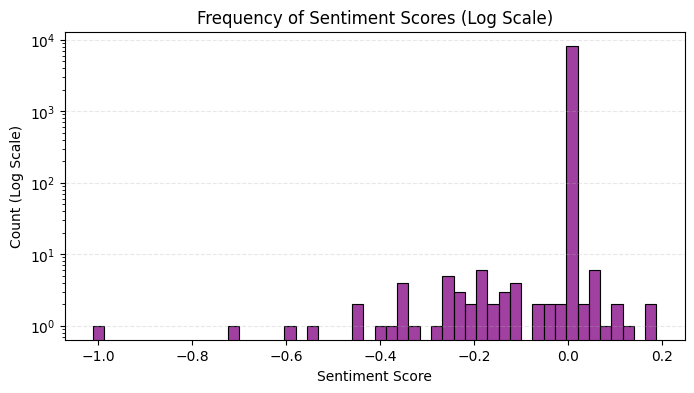

In [15]:
plt.figure(figsize=(8, 4))
# We remove 'kde=True' to avoid the math errors causing those "canyons"
sns.histplot(df['sentiment'], color='purple', bins=50)

# Apply log scale only to the Y-axis (counts)
plt.yscale('log')

plt.title("Frequency of Sentiment Scores (Log Scale)")
plt.ylabel("Count (Log Scale)")
plt.xlabel("Sentiment Score")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.savefig(f"{RESULTS_DIR}/figures/eda/sentiment_distribution.png")

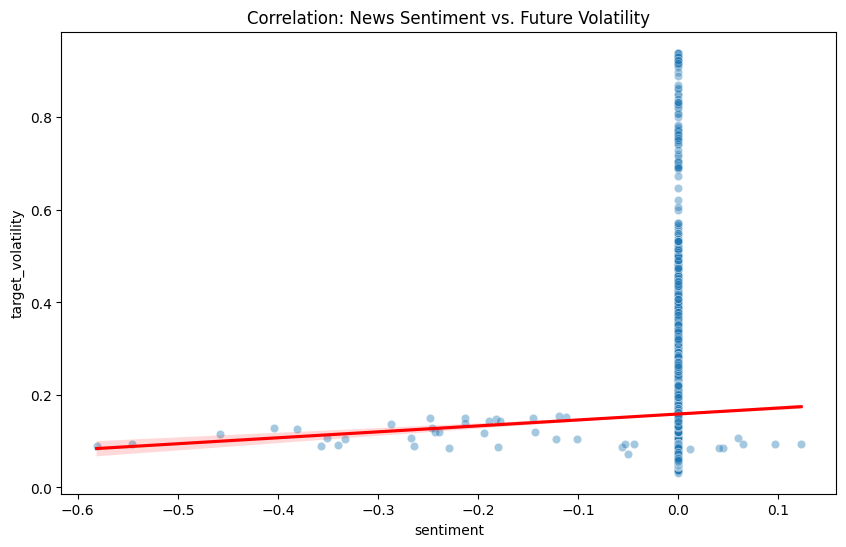

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sentiment', y='target_volatility', alpha=0.4)
sns.regplot(data=df, x='sentiment', y='target_volatility', scatter=False, color='red')
plt.title("Correlation: News Sentiment vs. Future Volatility")
plt.savefig(f"{RESULTS_DIR}/figures/eda/sentiment_vol_scatter.png")